In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
g = nx.read_gml('networks/italy_995.gml', label='id')
pos = {node:(g.nodes[node]['Longitude'], g.nodes[node]['Latitude']) for node in g.nodes}

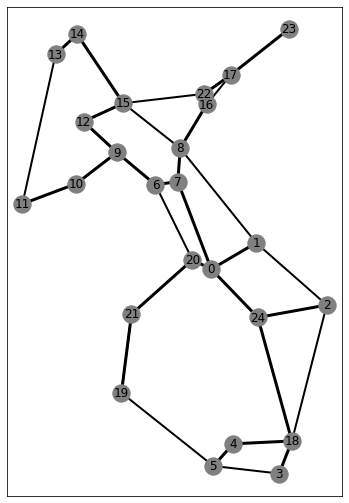

In [60]:
fig,ax = plt.subplots(figsize=(6,9))

options = {
    'node_size': 300,
    'node_color': 'gray',
    'width': [2+1*g.edges[edge]['onspine'] for edge in g.edges],
}
nx.draw_networkx(g, pos, ax, **options)

In [51]:
df = pd.read_csv('results/italy_995/upgrade_level/SB0/upgrade_italy_995_TFA0.0050_SB0.csv')
upgrades = df['Delta H (ILP)'].to_list()

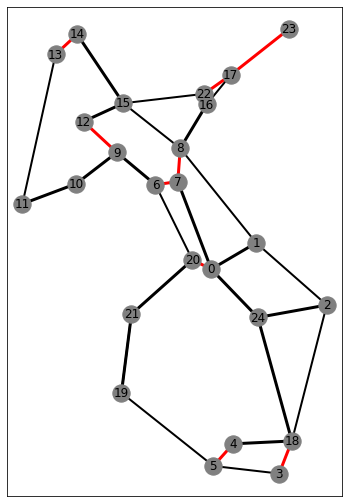

In [61]:
fig,ax = plt.subplots(figsize=(6,9))

options = {
    'node_size': 300,
    'node_color': 'gray',
    'width': [2+1*g.edges[edge]['onspine'] for edge in g.edges],
    'edge_color': ['red' if upgrade>0 else 'black' for upgrade in upgrades]
}
nx.draw_networkx(g, pos, ax, **options)

In [53]:
route = [(8,1,0),(5,3,0),(18,3,0),(19,5,0),(9,6,0),(15,8,0),(10,9,0),(11,10,0),(13,11,0),(14,13,0),(21,19,0),(21,19,1),(20,21,0),(14,15,0),(6,20,0),(2,18,0),(1,2,0)]

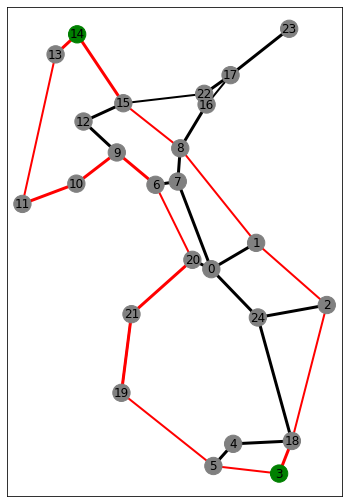

In [58]:
fig,ax = plt.subplots(figsize=(6,9))

options = {
    'node_size': 300,
    'node_color': ['green' if node in [3,14] else 'gray' for node in g.nodes],
#     'width': [2 for edge in g.edges],
    'width': [2+1*g.edges[edge]['onspine'] for edge in g.edges],
#     'edge_color': ['red' if upgrade>0 else 'black' for upgrade in upgrades],
    'edge_color': ['red' if (u,v,w) in route or (v,u,w) in route else 'black' for (u,v,w) in g.edges]
}
nx.draw_networkx(g, pos, ax, **options)